In [1]:
import pandas as pd
label_csv=pd.read_csv("D:/abhinav/data/dog breed/labels.csv")

In [2]:
import jupyterthemes as jt

In [3]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [4]:
set_nb_theme('monokai')

In [5]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
filename = ["D:/abhinav/data/dog breed/train/" + fname + ".jpg" for fname in label_csv["id"]]

In [7]:
filename[:10]

['D:/abhinav/data/dog breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'D:/abhinav/data/dog breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'D:/abhinav/data/dog breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'D:/abhinav/data/dog breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'D:/abhinav/data/dog breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'D:/abhinav/data/dog breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'D:/abhinav/data/dog breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'D:/abhinav/data/dog breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'D:/abhinav/data/dog breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'D:/abhinav/data/dog breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [8]:
import os
if len(os.listdir("D:/abhinav/data/dog breed/train")) == len(filename):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


In [9]:
from IPython.display import Image

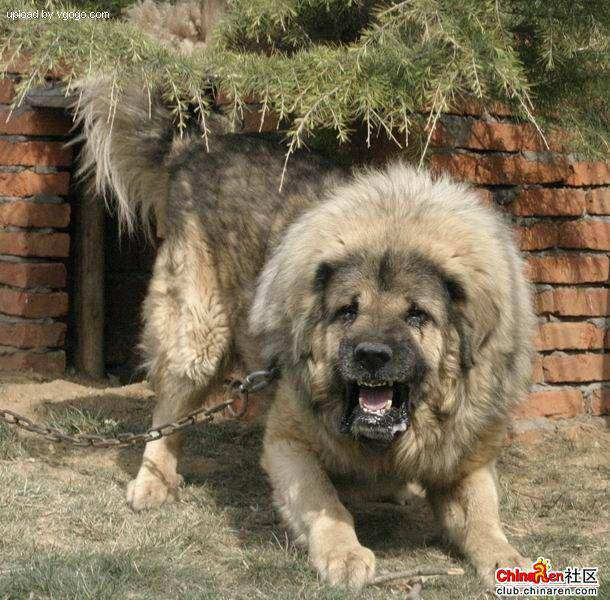

In [10]:
Image(filename[9000])

In [11]:
import tensorflow as tf
import tensorflow_hub as hub


In [12]:
#converting lables into numbers
import numpy as np
labels=label_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
#check if number of labels is equal to number of filenaems
if len(labels)==len(filename):
    print("Y")
else:
    print("N")

Y


In [15]:
#find the unique labels in the array
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [16]:
#turn every label into boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
#creating validation set
X=filename
y=boolean_labels

In [18]:
#the experimentation and training will be done only in 1000 images
NUM_IMAGES = 1000 


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES]
                                            ,test_size=0.2,random_state=42)

In [20]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

### Preprocessing Images(turning into tensors)

In [21]:
IMG_SIZE=224
def process_image(image_path):
    #read an image file
    image=tf.io.read_file(image_path)
    #turn the jpeg image into tensorrs with 3 color channels(RGB)
    image=tf.image.decode_jpeg(image,channels=3)
    #convert the color channel values form 0=255 to 0-1 values(normalizaton)
    image=tf.image.convert_image_dtype(image,tf.float32)
    #resize the image to (224,224)
    image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    return image

## Turnining data into batches

In [22]:
# Tensorflow works when the data is in the form of tuples like (image,label)
def get_image_label(image_path,label):
    image=process_image(image_path)
    return image,label


In [23]:
#Converting this tuple into batches
BATCH_SIZE=32
# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [24]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [25]:
#attributes of data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Building the model

In [26]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] #batch,height,width,color channe;
OUTPUT_SHAPE=len(unique_breeds)
#Setup model url from tensor flow hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [27]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [28]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Callbacks for tensorboard and early stopping

In [29]:
#Tensor board callback
%load_ext tensorboard

In [30]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("D:/abhinav/data/dog breed/log",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [31]:
 #Early stoppping callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [32]:
#Model training on 1000 images
NUM_EPOCHS=100

In [33]:
#Function for training the model
def train_model():
    model=create_model()
    #call the function to log all the training
    tensorboard=create_tensorboard_callback()
    #fit the model
    model.fit(x=train_data,epochs=NUM_EPOCHS,validation_data=val_data,
             validation_freq=1,callbacks=[early_stopping,tensorboard])
    return model

In [34]:
%%time
np.random.seed(42)
model=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 27s 628ms/step - loss: 4.5542 - accuracy: 0.0950 - val_loss: 3.5863 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 14s 550ms/step - loss: 1.6406 - accuracy: 0.6925 - val_loss: 2.2566 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 14s 555ms/step - loss: 0.5734 - accuracy: 0.9388 - val_loss: 1.7048 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 14s 563ms/step - loss: 0.2600 - accuracy: 0.9825 - val_loss: 1.5131 - val_accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - 14s 566ms/step - loss: 0.1510 - accuracy: 0.9937 - val_loss: 1.4430 - val_accuracy: 0.6050
Epoch 6/100
25/25 [==============================] - 14s 566ms/step - loss: 0.1019 - accuracy: 1.0000 - val_loss: 1.3828 - val_accuracy: 0.6050
Epoch 7/100
25/25 [========================

In [35]:
#the model is overfitting as valid accuracy is lesser than test accuracy,check the 
#tensorboard directory and visualise its contents

In [36]:
%tensorboard --logdir D:/abhinav/data/dog\ breed/log --port 808


### Making predictions

In [37]:
predictions =model.predict(val_data,verbose=1)

7/7 [==============================] - 4s 452ms/step


In [38]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}")


[1.25909655e-03 5.87685608e-05 9.25023167e-04 1.18001753e-05
 2.77091603e-04 1.75977111e-05 7.72961369e-03 1.50002088e-04
 6.86242769e-04 8.03004834e-04 2.28099176e-04 3.10958305e-04
 1.20891658e-04 1.07982349e-04 1.90757011e-04 6.97089054e-05
 1.85970475e-05 3.95825803e-02 6.04218803e-05 8.78514220e-06
 8.84461333e-05 1.11259040e-04 9.98116502e-06 4.65412828e-04
 3.62129576e-05 6.63566534e-05 2.76867777e-01 2.28624558e-05
 1.96530294e-04 7.65573757e-04 1.96143737e-04 8.40608962e-04
 3.89672205e-04 2.15144573e-05 6.71857342e-05 1.09638572e-02
 9.12019914e-06 3.01738415e-04 1.46167906e-04 2.61562000e-05
 2.11685896e-03 1.59324861e-06 1.99478949e-04 2.06421828e-05
 2.03581185e-05 5.57570711e-05 3.80070305e-05 1.16485004e-04
 5.32901468e-05 5.04933778e-05 7.39733441e-05 7.52043488e-05
 2.74420017e-04 7.35346475e-05 1.69442719e-05 5.52217498e-05
 1.15572606e-04 5.64094214e-03 1.09789937e-04 3.12243730e-01
 1.39051786e-04 2.05762103e-06 3.90709471e-03 1.22242336e-05
 1.00987949e-04 1.535862

In [39]:
def get_pred_label(prediction_probabilities):
    return   unique_breeds[np.argmax(prediction_probabilities)]


In [40]:
pred_label=get_pred_label(predictions[9])
pred_label

'collie'

In [41]:
#unbatch the val_data and make predictions
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [51]:
import matplotlib.pyplot as plt
def plot_pred(prediction_probabilities,labels,images,n=1): 
    pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]
    pred_label=get_pred_label(pred_prob)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    if pred_label==true_label:
        color="green"
    else:
        color="red"
    plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)
    pass

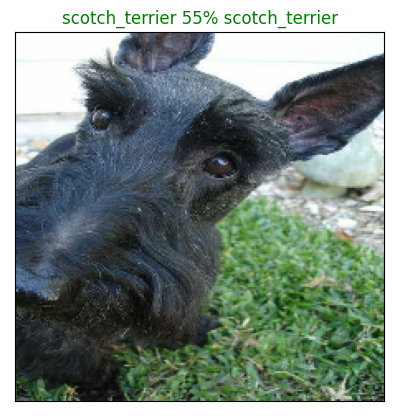

In [52]:
plot_pred(prediction_probabilities=predictions,labels=val_labels,images=val_images)

In [68]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

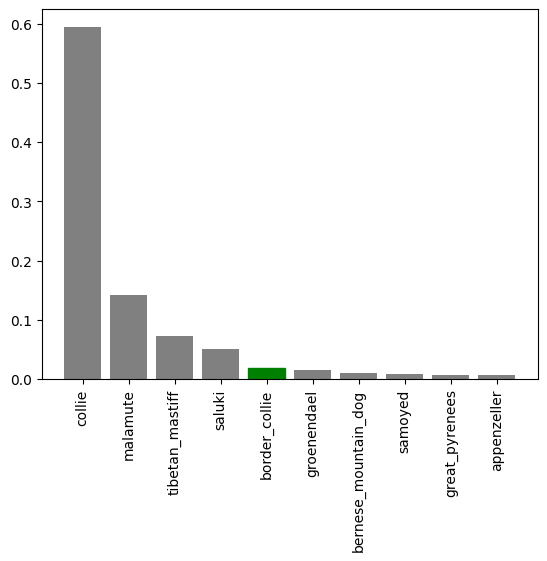

In [69]:
plot_pred_conf(prediction_probabilities=predictions,labels=val_labels,n=9)

### Training the model on the complete data

In [85]:
#creating  a data batch
full_data=create_data_batches(X,y)

Creating training data batches...


In [87]:
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [88]:
full_model_tensorboard=create_tensorboard_callback()
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy"
                                                          ,patience=3)

In [89]:
%%time
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard
                                                       ,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 177s 526ms/step - loss: 1.3497 - accuracy: 0.6685
Epoch 2/100
320/320 [==============================] - 136s 426ms/step - loss: 0.4089 - accuracy: 0.8827
Epoch 3/100
320/320 [==============================] - 140s 439ms/step - loss: 0.2392 - accuracy: 0.9337
Epoch 4/100
320/320 [==============================] - 141s 441ms/step - loss: 0.1539 - accuracy: 0.9636
Epoch 5/100
320/320 [==============================] - 136s 424ms/step - loss: 0.1075 - accuracy: 0.9781
Epoch 6/100
320/320 [==============================] - 137s 429ms/step - loss: 0.0788 - accuracy: 0.9864
Epoch 7/100
320/320 [==============================] - 132s 413ms/step - loss: 0.0593 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 138s 432ms/step - loss: 0.0469 - accuracy: 0.9941
Epoch 9/100
320/320 [==============================] - 140s 436ms/step - loss: 0.0374 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] -

In [113]:
#Making predictions on test dataset
test_path="D:/abhinav/data/dog breed/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['D:/abhinav/data/dog breed/test/000621fb3cbb32d8935728e48679680e.jpg',
 'D:/abhinav/data/dog breed/test/00102ee9d8eb90812350685311fe5890.jpg',
 'D:/abhinav/data/dog breed/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'D:/abhinav/data/dog breed/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'D:/abhinav/data/dog breed/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'D:/abhinav/data/dog breed/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'D:/abhinav/data/dog breed/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'D:/abhinav/data/dog breed/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'D:/abhinav/data/dog breed/test/002f80396f1e3db687c5932d7978b196.jpg',
 'D:/abhinav/data/dog breed/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [114]:
len(test_filenames)

10357

In [115]:
test_data=create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [116]:
%%time
test_predicitons=full_model.predict(test_data,verbose=1)

324/324 [==============================] - 147s 454ms/step
CPU times: total: 2min 9s
Wall time: 2min 27s


In [117]:
test_predicitons.shape

(10357, 120)

In [137]:
#Make predictions on custom images
custom_path = "D:/abhinav/data/dog breed/custom/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [138]:
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [139]:
custom_preds = full_model.predict(custom_data)

1/1 [==============================] - 0s 105ms/step


In [140]:
custom_preds.shape

(3, 120)

In [141]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['german_shepherd', 'shih-tzu', 'american_staffordshire_terrier']

In [142]:
# Get custom images 
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

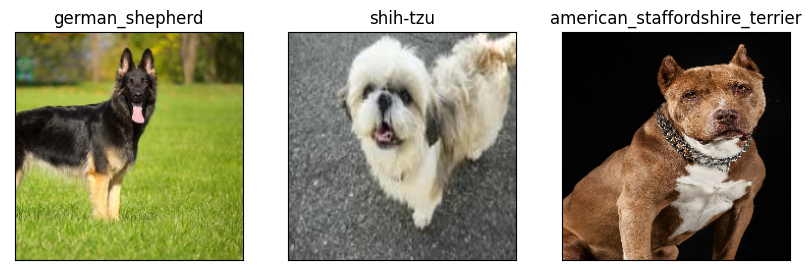

In [143]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)